# Naive Bayes

### Introduction

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.


### Bayes' Theorem and Machine Learning - Theory

$$
P(B|A) = {\frac{P(B) \cdot P(A|B)}{P(A)} \ , \ if \ P(A) \neq 0}
$$

- A and B are events
- P(A) and P(B) are the probabilities of observing A and B without any given conditions
- P(A|B) is a conditional probability: the probability of event A occurring given that B is true, P(B|A) is the probability of event B occurring given that A is true

In the context of machine learning, Bayes' Theorem is used to calculate the probability of a feature belonging to a particular class.

Given a feature vector x ( $\mathrm{x} = (x_1, x_2, x_3, ..., x_n)$ ) and a class label $C_k$, the probability of x belonging to class $C_k$ is calculated as follows:

$$p(C_k|\mathrm{x}) = \frac{p(C_k)  \cdot p(\mathrm{x}|C_k)}{p(\mathrm{x})}$$

Basically the numerator is the joint probability of the class and the feature vector, and the denominator is the probability of the feature vector:

$$p(C_k|\mathrm{x}) = \frac{p(C_k, x_1, ..., x_n)}{p(\mathrm{x})}$$

With the assumption of *mutually independent features*, the above equation can be simplified to:

$$p(x_i | x_{i+1}, ..., x_n, C_k) = p(x_i | C_k)$$

Applied to natural language, the assumption of independence is not realistic, as it implies that each word in a text is an independent feature. However, Naive Bayes still performs well in practice, even when the independence assumption is violated.

For all $i$, the relationship is simplified to:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule, which can be read as "the probability of a feature $x$ belonging to a class $C_k$, given a feature set $x_1, ..., x_n$ is proportional and multiplied by the probability of the class $C_k$ and the product of the probabilities of each feature $x_i$ given the class $C_k$":

$$P(C_k \mid x_1, \dots, x_n) \propto P(C_k) \prod_{i=1}^{n} P(x_i \mid C_k)$$

And we can use the following classification rule:

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$



## Naive Bayes models

- Multinomial Naive Bayes
- Gaussian Naive Bayes
- Complement Naive Bayes
- Bernoulli Naive Bayes
- Categorical Naive Bayes

The most common models are Multinomial, Gaussian, and Bernoulli Naive Bayes. The Multinomial Naive Bayes model is commonly used in text classification.

Historical data is used to classify a new text into one of the categories and train the model.

### Multinomial Naive Bayes

Multinomial Naive Bayes classifies text using a count vectorization model: counting the frequency of each word in each document.

- Given the amount of data already categorized, create probability distributions for each class
- Start count vectorization: count the frequency of each word in each document
- Calculate the probability of each word in each class

## NLP with Python

### Manual vectorization

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
with open('./data/nlp_one.txt') as mytext:
    a = mytext.read()

In [10]:
a

'This is a story about dogs\nour canine pets\nDogs are furry animals\n'

In [11]:
with open('./data/nlp_one.txt') as mytext:
    a = mytext.readlines()

In [12]:
a

['This is a story about dogs\n',
 'our canine pets\n',
 'Dogs are furry animals\n']

In [13]:
with open('./data/nlp_one.txt') as mytext:
    a = mytext.read()

In [14]:
a.lower().split()

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals']

In [15]:
with open('./data/nlp_two.txt') as mytext:
    a = mytext.read()

In [16]:
a

'This story is about surfing\nCatching waves is fun\nSurfing is a popular water sport\n'

In [19]:
with open('./data/nlp_one.txt') as mytext:
    words_one = mytext.read().lower().split()
    unique_words_one = set(words_one)

In [18]:
unique_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [20]:
with open('./data/nlp_two.txt') as mytext:
    words_two = mytext.read().lower().split()
    unique_words_two = set(words_two)

In [21]:
unique_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [22]:
all_unique_words = set()
all_unique_words.update(unique_words_one)

In [23]:
all_unique_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [24]:
all_unique_words.update(unique_words_two)

In [25]:
all_unique_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [26]:
full_vocabulary = dict()
i = 0

for word in all_unique_words:
    full_vocabulary[word] = i
    i += 1

In [27]:
full_vocabulary

{'catching': 0,
 'story': 1,
 'waves': 2,
 'animals': 3,
 'sport': 4,
 'surfing': 5,
 'furry': 6,
 'this': 7,
 'water': 8,
 'pets': 9,
 'is': 10,
 'canine': 11,
 'fun': 12,
 'are': 13,
 'about': 14,
 'dogs': 15,
 'popular': 16,
 'a': 17,
 'our': 18}

In [29]:
one_frequency = [0] * len(full_vocabulary)
two_frequency = [0] * len(full_vocabulary)
all_words = ['']*len(full_vocabulary)

In [30]:
one_frequency

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
two_frequency

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
all_words

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [33]:
with open('./data/nlp_one.txt') as f:
    one_text = f.read().lower().split()

In [34]:
for word in one_text:
    word_index = full_vocabulary[word]
    one_frequency[word_index] += 1

In [35]:
one_frequency

[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1]

In [36]:
with open('./data/nlp_two.txt') as f:
    two_text = f.read().lower().split()

In [37]:
for word in two_text:
    word_index = full_vocabulary[word]
    two_frequency[word_index] += 1

In [38]:
two_frequency

[1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 1, 1, 0]

In [39]:
for word in full_vocabulary:
    word_index = full_vocabulary[word]
    all_words[word_index] = word

In [40]:
all_words

['catching',
 'story',
 'waves',
 'animals',
 'sport',
 'surfing',
 'furry',
 'this',
 'water',
 'pets',
 'is',
 'canine',
 'fun',
 'are',
 'about',
 'dogs',
 'popular',
 'a',
 'our']

In [44]:
bag_of_words = pd.DataFrame([one_frequency, two_frequency], columns=all_words)
bag_of_words

,catching,story,waves,animals,sport,surfing,furry,this,water,pets,is,canine,fun,are,about,dogs,popular,a,our
0,0,1,0,1,0,0,1,1,0,1,1,1,0,1,1,2,0,1,1
1,1,1,1,0,1,2,0,1,1,0,3,0,1,0,1,0,1,1,0


### Using scikit-learn

In [49]:
sample_text = ['This is a line', 'This is another line', 'Completely different line']

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [51]:
cv = CountVectorizer()

In [53]:
sparse_matrix = cv.fit_transform(sample_text)

In [54]:
# don't use this in production, as a large dataset will consume a lot of memory
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [55]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [56]:
cv = CountVectorizer(stop_words='english')

In [57]:
sparse_matrix = cv.fit_transform(sample_text)

In [58]:
cv.vocabulary_

{'line': 2, 'completely': 0, 'different': 1}

In [60]:
tfidf = TfidfTransformer()

In [61]:
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(sample_text)

In [62]:
results = tfidf.fit_transform(sparse_matrix)

In [63]:
results

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (3, 6)>

In [64]:
# don't use this in production, as a large dataset will consume a lot of memory
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

`TfidfVectorizer` is a shortcut to `CountVectorizer` followed by `TfidfTransformer`.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tv = TfidfVectorizer()

In [67]:
tv_results = tv.fit_transform(sample_text)

In [68]:
tv_results

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (3, 6)>

In [69]:
# don't use this in production, as a large dataset will consume a lot of memory
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

### Classification example

In [71]:
df = pd.read_csv('./data/airline_tweets.csv')

In [72]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

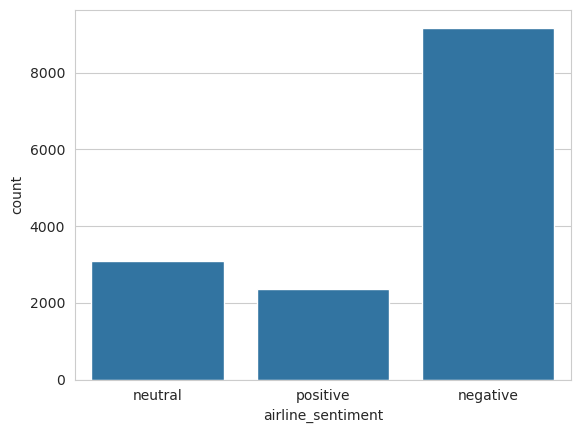

In [74]:
sns.countplot(data=df, x='airline_sentiment')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

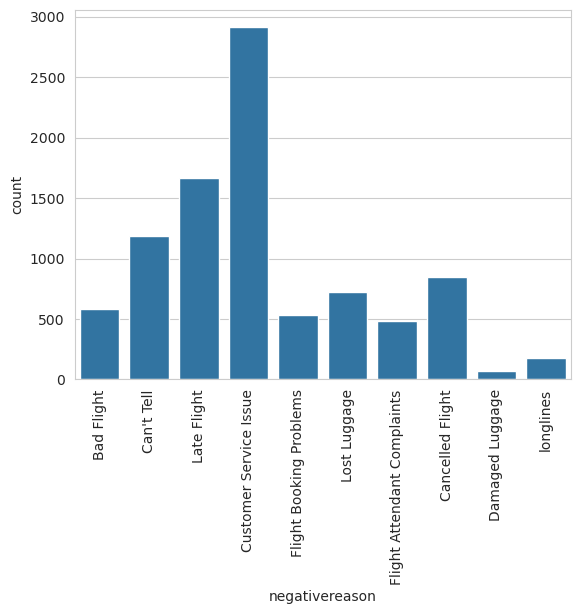

In [76]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90)

<Axes: xlabel='airline', ylabel='count'>

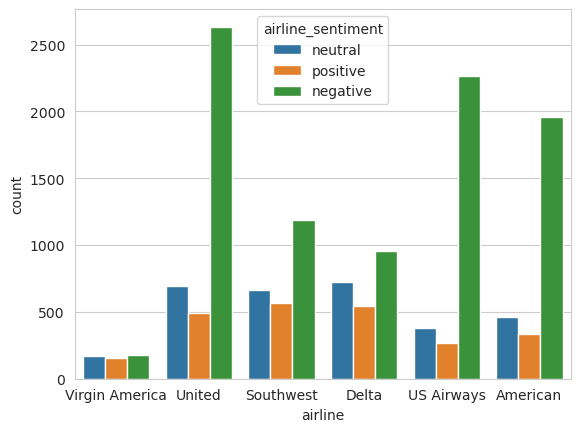

In [77]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

In [78]:
data = df[['airline_sentiment', 'text']]
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [79]:
X = data['text']
y = data['airline_sentiment']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf = TfidfVectorizer(stop_words='english')

In [84]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [85]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [87]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [88]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [89]:
from sklearn.svm import SVC, LinearSVC

In [90]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [91]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [94]:
def report(model):
    predictions = model.predict(X_test_tfidf)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928

[[1807    9    1]
 [ 524   97    7]
 [ 399   17   67]]


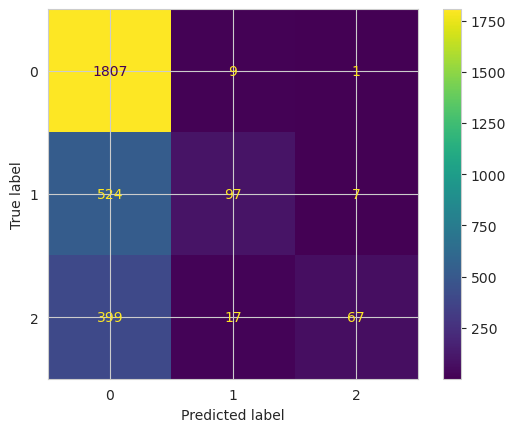

In [95]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928

[[1695  101   21]
 [ 292  293   43]
 [ 133   71  279]]


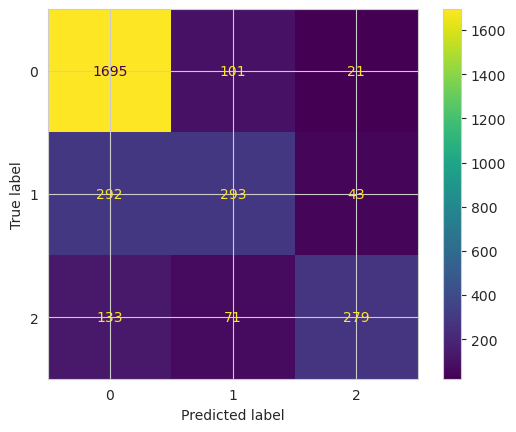

In [96]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928

[[1721   73   23]
 [ 330  256   42]
 [ 156   55  272]]


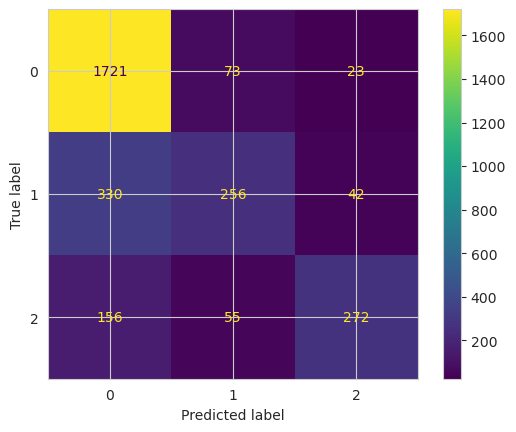

In [97]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928

[[1624  158   35]
 [ 240  327   61]
 [ 106   69  308]]


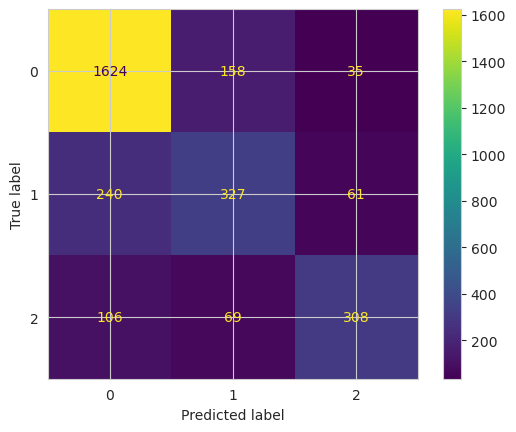

In [98]:
report(linear_svc)

In [99]:
from sklearn.pipeline import Pipeline

In [100]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [101]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [102]:
pipe.predict(['This was a great flight'])

array(['positive'], dtype=object)

In [103]:
pipe.predict(['I will never fly with this airline again'])

array(['negative'], dtype=object)

In [106]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)

### Exercise

In [109]:
movies = pd.read_csv('./data/moviereviews.csv')

In [115]:
movies

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [116]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [118]:
movies['review'].str.isspace().sum()

np.int64(27)

In [119]:
movies[movies['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [215]:
df = movies[~movies['review'].str.isspace()]

In [216]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [241]:
X = df['review']
y = df['label']

In [260]:
tfidf = TfidfVectorizer(stop_words='english')

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [262]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [263]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [264]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [265]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [266]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

              precision    recall  f1-score   support

         neg       0.71      0.89      0.79       473
         pos       0.86      0.65      0.74       496

    accuracy                           0.76       969
   macro avg       0.78      0.77      0.76       969
weighted avg       0.78      0.76      0.76       969

[[419  54]
 [174 322]]


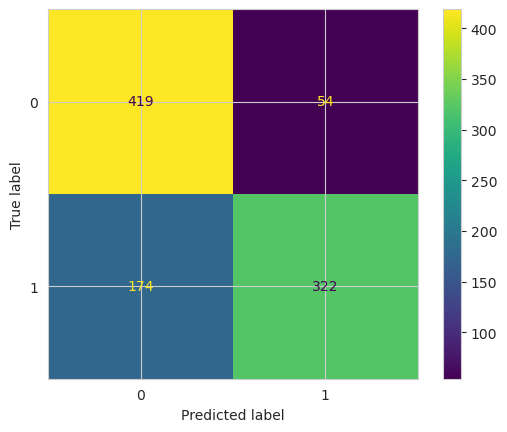

In [267]:
report(nb)

              precision    recall  f1-score   support

         neg       0.80      0.80      0.80       473
         pos       0.81      0.81      0.81       496

    accuracy                           0.80       969
   macro avg       0.80      0.80      0.80       969
weighted avg       0.80      0.80      0.80       969

[[379  94]
 [ 96 400]]


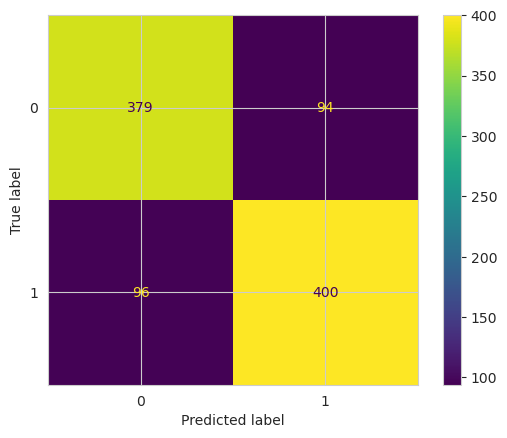

In [268]:
report(log_model)

              precision    recall  f1-score   support

         neg       0.80      0.78      0.79       473
         pos       0.79      0.81      0.80       496

    accuracy                           0.80       969
   macro avg       0.80      0.80      0.80       969
weighted avg       0.80      0.80      0.80       969

[[369 104]
 [ 93 403]]


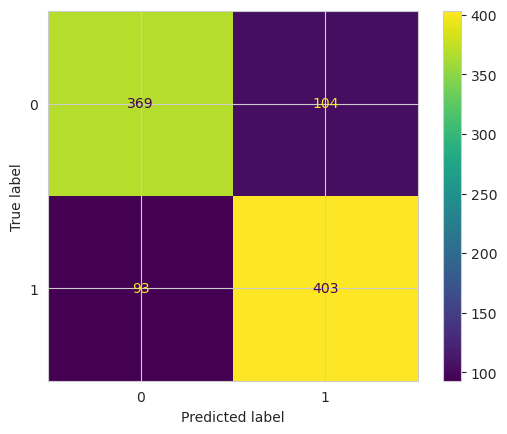

In [269]:
report(rbf_svc)

              precision    recall  f1-score   support

         neg       0.82      0.79      0.81       473
         pos       0.81      0.83      0.82       496

    accuracy                           0.81       969
   macro avg       0.81      0.81      0.81       969
weighted avg       0.81      0.81      0.81       969

[[376  97]
 [ 84 412]]


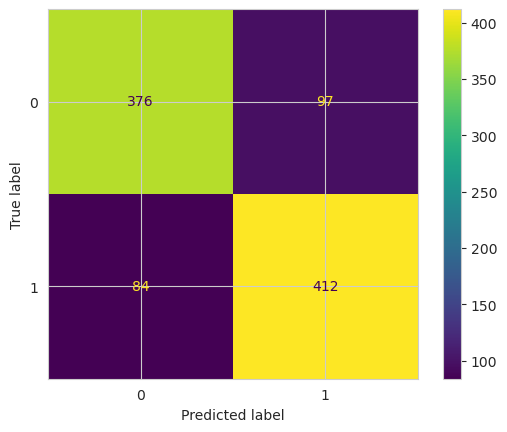

In [270]:
report(linear_svc)

In [271]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('linear SVC', LinearSVC())])

In [272]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('linear SVC', LinearSVC())])

In [273]:
pipe.predict(['Great movie!'])

array(['pos'], dtype=object)

In [274]:
pipe.predict(['Bad movie'])

array(['neg'], dtype=object)

In [276]:
pipe.predict(['It was ok'])

array(['neg'], dtype=object)